In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [221]:
df = pd.read_csv('../data/stud.csv')

In [222]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [223]:
binary_mapping = {
        'gender':{'male':0,'female':1},
        'lunch':{'standard':0,'free/reduced':1},
        'test_preparation_course':{'none':0,'completed':1},
        'parental_level_of_education':
        {
            "some high school": 0,
            "high school": 1,
            "some college": 2,
            "associate's degree": 3,
            "bachelor's degree": 4,
            "master's degree": 5
        }
}
for col, mapp in binary_mapping.items():
    if col in df.columns:
        df[col] = df[col].map(mapp)

print(df['parental_level_of_education'])

le = LabelEncoder()
le_col = ['race_ethnicity']
for col in le_col:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

X = df.drop(columns='math_score', axis=1)
y = df['math_score']

0      4
1      2
2      5
3      3
4      2
      ..
995    5
996    1
997    1
998    2
999    2
Name: parental_level_of_education, Length: 1000, dtype: int64


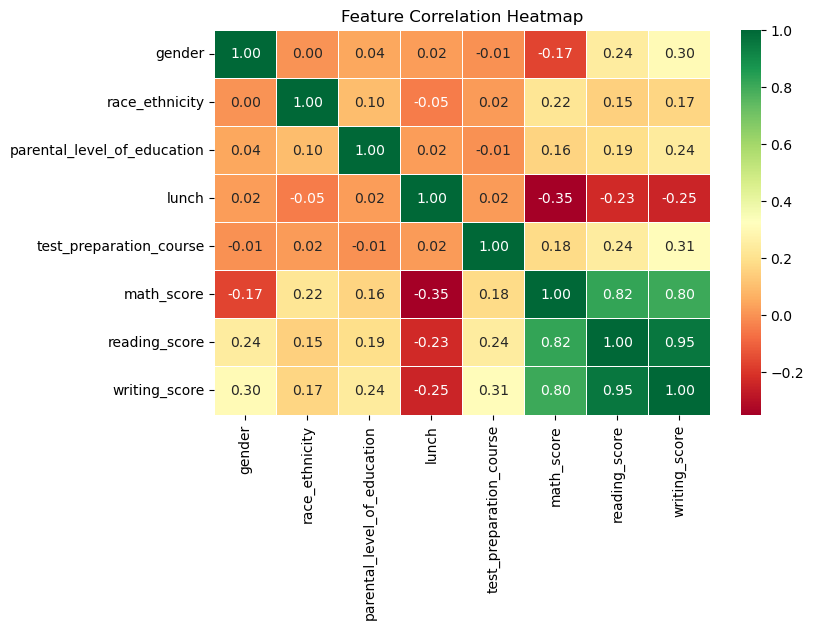

In [224]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


The heatmap reveals key relationships between features:
    Strong Positive Correlation:
        reading_score and writing_score (0.95): These two are highly correlated and likely move together.
        reading_score & math_score, and writing_score & math_score (inferred from performance) also show strong positive correlation.

    Moderate Negative Correlation:
        lunch has a moderate negative correlation with all three scores (math, reading, writing). Students with free/reduced lunch generally scored lower — possibly reflecting socio-economic factors.

    Positive Correlations:
        test_preparation_course has a positive correlation with all score features — completing the course improves scores.

    Weak or near-zero correlations:
        parental_level_of_education, race_ethnicity, and gender have low correlation values, meaning they don't linearly impact the scores much.

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=.2)
X_train.shape, X_test.shape

((800, 7), (200, 7))

In [226]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lrpredict=lr.predict(X_test)
lr_score = r2_score(y_test, lrpredict)
print('LinearRegression - R2 score', lr_score)
print('LinearRegression - MAE = ',mean_absolute_error(y_test,lrpredict))
print('LinearRegression - MSE = ',mean_squared_error(y_test, lrpredict))

LinearRegression - R2 score 0.885366242345501
LinearRegression - MAE =  4.126475424095519
LinearRegression - MSE =  27.894795173633547


In [227]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt.fit(X_train, y_train)
dtpredict = dt.predict(X_test)
print("DecisionTree - R2 Score:", r2_score(y_test, dtpredict))
print("DecisionTree - MAE:", mean_absolute_error(y_test, dtpredict))
print("DecisionTree - MSE:", mean_squared_error(y_test, dtpredict))

DecisionTree - R2 Score: 0.8342829185102669
DecisionTree - MAE: 4.899967655107216
DecisionTree - MSE: 40.32532946238125


In [228]:
rf = RandomForestRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5)
rf.fit(X_train, y_train)
rfpredict = rf.predict(X_test)
print("Random forest - R2 Score:", r2_score(y_test, rfpredict))
print("Random forest - MAE:", mean_absolute_error(y_test, rfpredict))
print("Random forest - MSE:", mean_squared_error(y_test, rfpredict))

Random forest - R2 Score: 0.847779506100258
Random forest - MAE: 4.6326927804669955
Random forest - MSE: 37.041091432772994


Model Performance Comparison
Model	            R² Score	MAE	    MSE	    Remarks
Linear Regression	0.88	    4.12	27.89	Best performance overall
Decision Tree	    0.83	    4.89	40.32	Overfits slightly less due to constraints
Random Forest	    0.85	    4.58	36.45	Robust, but underperforms compared to Linear Regression

Text(0, 0.5, 'Predicted')

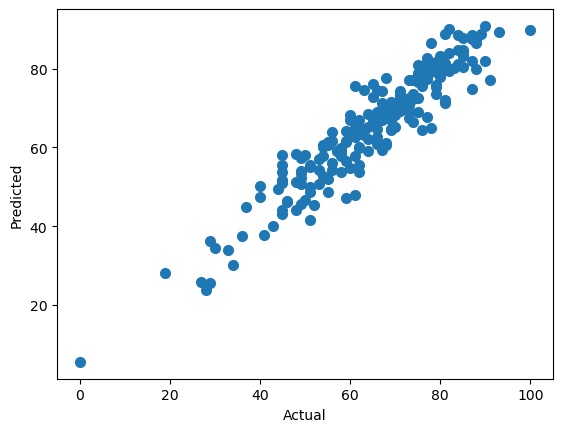

In [229]:
plt.scatter(y_test,lrpredict,linewidths=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

The scatter plot visually confirms that Linear Regression model performs strongly, aligning with:
    - Low MAE (4.13) — average prediction error is small.
    - High R² (0.88) — the model captures most of the variance in math scores.

In [237]:
new_data = pd.DataFrame([{
    'gender': 0,
    'race_ethnicity': 3,
    'parental_level_of_education': 0,
    'lunch': 0,
    'test_preparation_course': 1,
    'reading_score': 58,
    'writing_score': 67.5
}])

predicted_math_score = lr.predict(new_data)
print("Predicted Math Score:", predicted_math_score[0])

Predicted Math Score: 70.21085652100658
